# **Preprocesamiento de imágenes histológicas**

#### Isabella Jimenez
#### Alejandro Duitama Leal
#### Camila Preciado



# Universidad Nacional de Colombia

## **1. Importamos paquetes**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import multiprocessing as mp
import os
import cv2
from PIL import Image, ImageFilter
from scipy.ndimage import gaussian_filter
from scipy import ndimage
from scipy import misc
from PIL import Image

In [ ]:
import numpy as np
import glob
import random
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt
import cv2
from PIL import Image

random.seed(98)
np.random.seed(98)

## **2. Cargar Archivos**

In [ ]:
dir = ""
FileListFolder = os.listdir("./Datos2/")

In [ ]:
print(FileListFolder)

['13689', '10275', '8917', '8959', '8916', '8984', '13692', '8980', '8956', '8957', '10277', '8865', '9023', '10282', '9029', '13613', '13617', '10299', '10295', '9035', '9022', '8918', '10308', '9037', '8975', '10293', '10276', '8863', '10291', '10305', '10303', '10288', '10279', '13688', '8913', '13687', '13616', '10286', '10292', '10273', '10301', '10300', '10274', '13691', '13666', '10285', '10306', '13591', '10278', '8914', '8955', '8867', '9043', '8864', '10304', '8950', '8951', '10302', '10290', '10307']


## **2.1. Listamos los archivos**

['drive/MyDrive/Colab Notebooks/ClasesDoctorado/VisionDeMaquina/bordes/0/8951_idx5_x501_y701_class0.png',
 'drive/MyDrive/Colab Notebooks/ClasesDoctorado/VisionDeMaquina/bordes/0/8951_idx5_x601_y1501_class0.png',
 'drive/MyDrive/Colab Notebooks/ClasesDoctorado/VisionDeMaquina/bordes/0/8951_idx5_x551_y1401_class0.png',
 'drive/MyDrive/Colab Notebooks/ClasesDoctorado/VisionDeMaquina/bordes/0/8951_idx5_x601_y1351_class0.png',
 'drive/MyDrive/Colab Notebooks/ClasesDoctorado/VisionDeMaquina/bordes/0/8951_idx5_x351_y1451_class0.png']

In [ ]:
len(FileList0)

7421

In [ ]:
len(FileList1)

5667

## **2.1. Cargamos los archivos**

## **2.1.1. Cargamos sin cancer** 

In [ ]:
#Archivos sin cáncer
ListImg0=[]
for NameFile0 in FileList0:
    Img0 = cv2.imread(NameFile0,0)
    ListImg0.append(Img0)

In [ ]:
len(ListImg0)

7421

## **2.1.2. Cargamos Con cáncer**

In [ ]:
#Archivos con cáncer
ListImg1=[]
for NameFile1 in FileList1:
    Img1 = cv2.imread(NameFile1,0)
    ListImg1.append(Img1)

In [ ]:
len(ListImg1)

5667

## **3. Procesamos**

## **3.1. Células con cáncer**

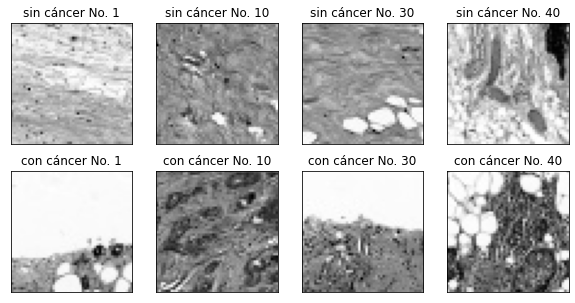

In [ ]:
NRows=2
NColumn=4

muestra=[1,10,30,40]

fig0 = plt.figure()
axes = fig0.subplots(nrows=NRows, ncols=NColumn)
for ncol in range(NColumn):
    axes[0, ncol].imshow(ListImg0[muestra[ncol]],cmap='gray',label="lab")
    lab="sin cáncer No. " + str(muestra[ncol])
    axes[0, ncol].set_title(lab)
    axes[0, ncol].get_xaxis().set_visible(False)
    axes[0, ncol].get_yaxis().set_visible(False)
    
    axes[1, ncol].imshow(ListImg1[muestra[ncol]],cmap='gray',label="lab")
    lab="con cáncer No. " + str(muestra[ncol])
    axes[1, ncol].set_title(lab)
    axes[1, ncol].get_xaxis().set_visible(False)
    axes[1, ncol].get_yaxis().set_visible(False)
fig0.set_size_inches(10, 5)

## **2.2. Filtrar ruido**

#### **Imagen de prueba** 

In [ ]:
ImgPru0=ListImg0[0]
ImgPru1=ListImg1[0]

#### **2.2.1. Imágenes sin cáncer**

In [ ]:
nOrder=3
Sigma_ini=0
Sigma_fin=3
DSigma=0.5
nSigma=int(((Sigma_fin-Sigma_ini)/DSigma))

In [ ]:
print(nSigma)

6


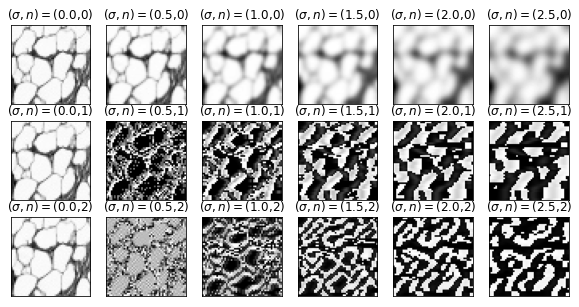

In [ ]:
fig = plt.figure()
axes = fig.subplots(nrows=nOrder, ncols=nSigma)
for norder in range(nOrder):
    for nsigma in range(nSigma):
        ImgGPru0=ndimage.gaussian_filter(ImgPru0, nsigma*DSigma, norder)
        lab="$(\sigma,n)=$" + "(" + str(nsigma*DSigma) + "," + str(norder) + ")"
        axes[norder, nsigma].imshow(ImgGPru0,cmap='gray',label="lab")
        axes[norder, nsigma].set_title(lab)
        axes[norder, nsigma].get_xaxis().set_visible(False)
        axes[norder, nsigma].get_yaxis().set_visible(False)
fig.set_size_inches(10, 5)

#### **2.2.2. Imágenes con cáncer**

In [ ]:
nOrder=3
Sigma_ini=0
Sigma_fin=3
DSigma=0.5
nSigma=int(((Sigma_fin-Sigma_ini)/DSigma))

In [ ]:
print(nSigma)

6


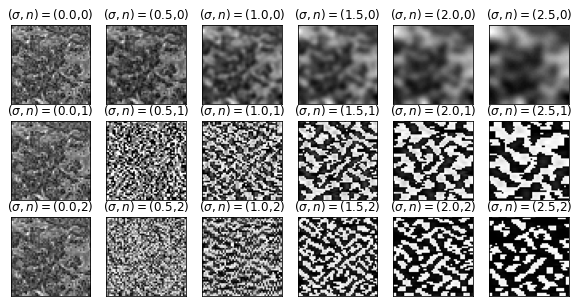

In [ ]:
fig = plt.figure()
axes = fig.subplots(nrows=nOrder, ncols=nSigma)
for norder in range(nOrder):
    for nsigma in range(nSigma):
        ImgGPru1=ndimage.gaussian_filter(ImgPru1, nsigma*DSigma, norder)
        lab="$(\sigma,n)=$" + "(" + str(nsigma*DSigma) + "," + str(norder) + ")"
        axes[norder, nsigma].imshow(ImgGPru1,cmap='gray',label="lab")
        axes[norder, nsigma].set_title(lab)
        axes[norder, nsigma].get_xaxis().set_visible(False)
        axes[norder, nsigma].get_yaxis().set_visible(False)
fig.set_size_inches(10, 5)

## **2.3. Seleccionamos los mejores parámetros para el filtro - tomamos las 4 mejores de arriba**

#### **sin cáncer**

In [ ]:
ImgG00=ndimage.gaussian_filter(ImgPru0, 0, 0)
ImgG01=ndimage.gaussian_filter(ImgPru0, 0.5, 0)
ImgG02=ndimage.gaussian_filter(ImgPru0, 1.0, 0)
ImgG03=ndimage.gaussian_filter(ImgPru0, 0, 1.0)

In [ ]:
ListImgGPru0=[ImgG00,ImgG01,ImgG02,ImgG03]

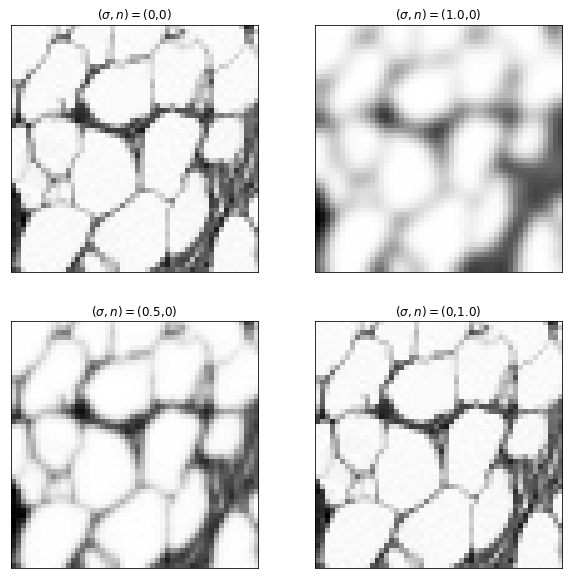

In [ ]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=2)

ImgGPru=ndimage.gaussian_filter(ListImgGPru0[0], 0, 0)
sigma=0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 0].set_title(lab)
axes[0, 0].imshow(ImgGPru,cmap='gray')
axes[0, 0].get_xaxis().set_visible(False)
axes[0, 0].get_yaxis().set_visible(False)

ImgGPru=ndimage.gaussian_filter(ListImgGPru0[1], 0.5, 0)
sigma=0.5
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 0].set_title(lab)
axes[1, 0].imshow(ImgGPru,cmap='gray')
axes[1, 0].get_xaxis().set_visible(False)
axes[1, 0].get_yaxis().set_visible(False)

ImgGPru=ndimage.gaussian_filter(ListImgGPru0[2], 1.0, 0)
sigma=1.0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 1].set_title(lab)
axes[0, 1].imshow(ImgGPru,cmap='gray')
axes[0, 1].get_xaxis().set_visible(False)
axes[0, 1].get_yaxis().set_visible(False)

ImgGPru=ndimage.gaussian_filter(ListImgGPru0[3], 0, 1.0)
sigma=0
order=1.0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 1].set_title(lab)
axes[1, 1].imshow(ImgGPru,cmap='gray')
axes[1, 1].get_xaxis().set_visible(False)
axes[1, 1].get_yaxis().set_visible(False)

fig.set_size_inches(10, 10)

####  **con cáncer**

In [ ]:
ImgG10=ndimage.gaussian_filter(ImgPru1, 0, 0)
ImgG11=ndimage.gaussian_filter(ImgPru1, 0.5, 0)
ImgG12=ndimage.gaussian_filter(ImgPru1, 1.0, 0)
ImgG13=ndimage.gaussian_filter(ImgPru1, 0, 1.0)

In [ ]:
ListImgGPru1=[ImgG10,ImgG11,ImgG12,ImgG13]

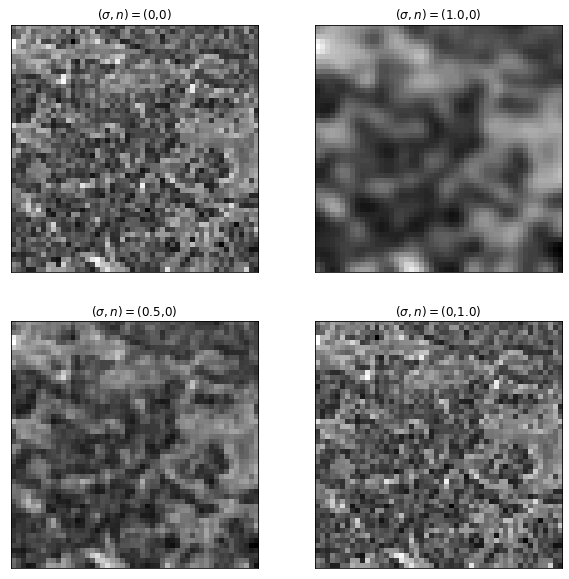

In [ ]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=2)

ImgGPru1=ndimage.gaussian_filter(ListImgGPru1[0], 0, 0)
sigma=0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 0].set_title(lab)
axes[0, 0].imshow(ImgGPru1,cmap='gray')
axes[0, 0].get_xaxis().set_visible(False)
axes[0, 0].get_yaxis().set_visible(False)

ImgGPru1=ndimage.gaussian_filter(ListImgGPru1[1], 0.5, 0)
sigma=0.5
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 0].set_title(lab)
axes[1, 0].imshow(ImgGPru1,cmap='gray')
axes[1, 0].get_xaxis().set_visible(False)
axes[1, 0].get_yaxis().set_visible(False)

ImgGPru1=ndimage.gaussian_filter(ListImgGPru1[2], 1.0, 0)
sigma=1.0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 1].set_title(lab)
axes[0, 1].imshow(ImgGPru1,cmap='gray')
axes[0, 1].get_xaxis().set_visible(False)
axes[0, 1].get_yaxis().set_visible(False)

ImgGPru1=ndimage.gaussian_filter(ListImgGPru1[3], 0, 1.0)
sigma=0
order=1.0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 1].set_title(lab)
axes[1, 1].imshow(ImgGPru1,cmap='gray')
axes[1, 1].get_xaxis().set_visible(False)
axes[1, 1].get_yaxis().set_visible(False)

fig.set_size_inches(10, 10)

### **2.4. Aplicamos a todas las Imagenes** 

#### **sin cáncer**

In [ ]:
ListImgG0=[]
for Img in ListImg0:
    ImgG0=ndimage.gaussian_filter(Img, 0,1)
    ListImgG0.append(ImgG0)

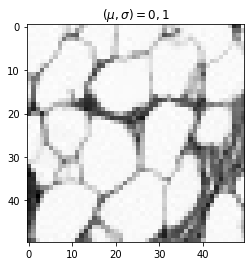

In [ ]:
plt.imshow(ListImgG0[0],cmap='gray')
plt.title("$( \mu , \sigma )=0,1$")
plt.show()

#### **con cáncer**

In [ ]:
ListImgG1=[]
for Img in ListImg1:
    ImgG1=ndimage.gaussian_filter(Img, 0.5, 0)
    ListImgG1.append(ImgG1)

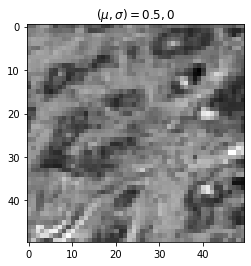

In [ ]:
plt.imshow(ListImgG1[10],cmap='gray')
plt.title("$( \mu , \sigma )=0.5,0$")
plt.show()

#### **Guardamos todas las Imágenes**

In [ ]:
#Archivos con cáncer
Dir= "./Datos4/Gauss/0/"
for i in range(len(ListImgG0)):
    cv2.imwrite(Dir+str(i)+"0.png",ListImgG0[i])

#Archivos con cáncer
Dir= "./Datos4/Gauss/1/"
for i in range(len(ListImgG1)):
    cv2.imwrite(Dir+str(i)+"1.png",ListImgG1[i])

## **2.4. Aplicamos Filtro Sobel**

In [ ]:
def FiltroSobel(ImgG):
    imgx = cv2.Sobel(ImgG,cv2.CV_16S,1,0,ksize=3)
    imgy = cv2.Sobel(ImgG,cv2.CV_16S,0,1,ksize=3)
    #   uint8
    imgx_uint8 = cv2.convertScaleAbs(imgx)
    imgy_uint8 = cv2.convertScaleAbs(imgy)
    # x, combinación de dirección y
    ImgS = cv2.addWeighted(imgx_uint8,0.5,imgy_uint8,1,4)
    return ImgS

#### **Sin Cáncer** 

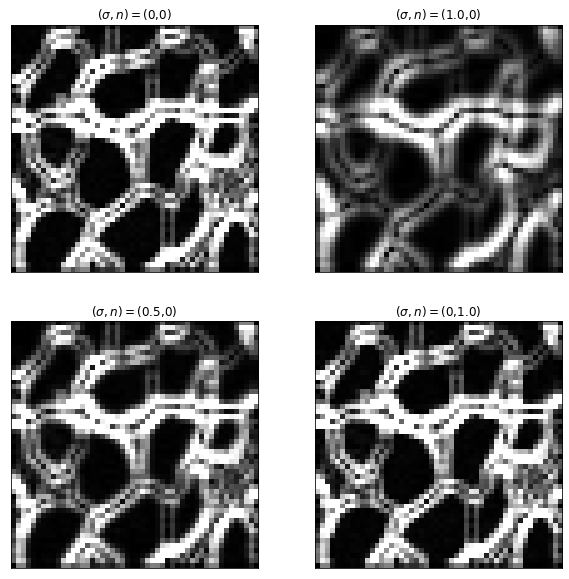

In [ ]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=2)

ImgGPru0=FiltroSobel(ListImgGPru0[0])
sigma=0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 0].set_title(lab)
axes[0, 0].imshow(ImgGPru0,cmap='gray')
axes[0, 0].get_xaxis().set_visible(False)
axes[0, 0].get_yaxis().set_visible(False)

ImgGPru0=FiltroSobel(ListImgGPru0[1])
sigma=0.5
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 0].set_title(lab)
axes[1, 0].imshow(ImgGPru0,cmap='gray')
axes[1, 0].get_xaxis().set_visible(False)
axes[1, 0].get_yaxis().set_visible(False)

ImgGPru0=FiltroSobel(ListImgGPru0[2])
sigma=1.0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 1].set_title(lab)
axes[0, 1].imshow(ImgGPru0,cmap='gray')
axes[0, 1].get_xaxis().set_visible(False)
axes[0, 1].get_yaxis().set_visible(False)

ImgGPru0=FiltroSobel(ListImgGPru0[3])
sigma=0
order=1.0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 1].set_title(lab)
axes[1, 1].imshow(ImgGPru0,cmap='gray')
axes[1, 1].get_xaxis().set_visible(False)
axes[1, 1].get_yaxis().set_visible(False)

fig.set_size_inches(10, 10)

#### **con cáncer**

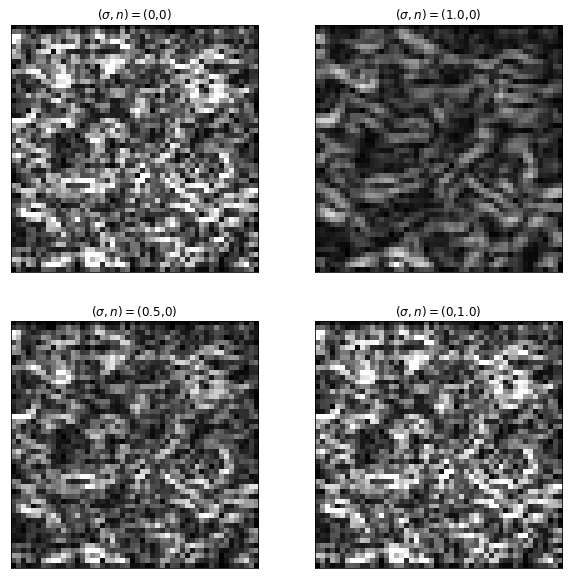

In [ ]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=2)

ImgGPru1=FiltroSobel(ListImgGPru1[0])
sigma=0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 0].set_title(lab)
axes[0, 0].imshow(ImgGPru1,cmap='gray')
axes[0, 0].get_xaxis().set_visible(False)
axes[0, 0].get_yaxis().set_visible(False)

ImgGPru1=FiltroSobel(ListImgGPru1[1])
sigma=0.5
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 0].set_title(lab)
axes[1, 0].imshow(ImgGPru1,cmap='gray')
axes[1, 0].get_xaxis().set_visible(False)
axes[1, 0].get_yaxis().set_visible(False)

ImgGPru1=FiltroSobel(ListImgGPru1[2])
sigma=1.0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 1].set_title(lab)
axes[0, 1].imshow(ImgGPru1,cmap='gray')
axes[0, 1].get_xaxis().set_visible(False)
axes[0, 1].get_yaxis().set_visible(False)

ImgGPru1=FiltroSobel(ListImgGPru1[3])
sigma=0
order=1.0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 1].set_title(lab)
axes[1, 1].imshow(ImgGPru1,cmap='gray')
axes[1, 1].get_xaxis().set_visible(False)
axes[1, 1].get_yaxis().set_visible(False)

fig.set_size_inches(10, 10)

#### **Todas las Imagenes**

In [ ]:
ListImgGS0=[]
for ImgG0 in ListImgG0:
    ImgGS0 = FiltroSobel(ImgG0)
    ListImgGS0.append(ImgGS0)

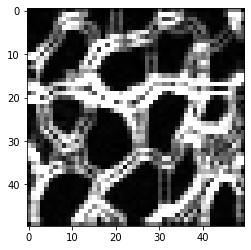

In [ ]:
plt.imshow(ListImgGS0[0],cmap='gray')
plt.show()

In [ ]:
ListImgGS1=[]
for ImgG1 in ListImgG1:
    ImgGS1 = FiltroSobel(ImgG1)
    ListImgGS1.append(ImgGS1)

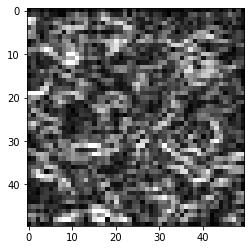

In [ ]:
plt.imshow(ListImgGS1[0],cmap='gray')
plt.show()

#### **Guardamos todas las Imágenes**

In [ ]:
#Archivos con cáncer
Dir= "./Datos4/Sobel/0/"
for i in range(len(ListImgGS0)):
    cv2.imwrite(Dir+str(i)+"0.png",ListImgGS0[i])

#Archivos con cáncer
Dir= "./Datos4/Sobel/1/"
for i in range(len(ListImgGS1)):
    cv2.imwrite(Dir+str(i)+"1.png",ListImgGS1[i])

## **2.4. Aplicamos Filtro Kirsch**

In [ ]:
def FiltroKirsch(ImgG):
    if ImgG.ndim > 2:
        raise Exception("illegal argument: input must be a single channel image (gray)")
    kernelG1 = np.array([[ 5,  5,  5],
                         [-3,  0, -3],
                         [-3, -3, -3]], dtype=np.float32)
    kernelG2 = np.array([[ 5,  5, -3],
                         [ 5,  0, -3],
                         [-3, -3, -3]], dtype=np.float32)
    kernelG3 = np.array([[ 5, -3, -3],
                         [ 5,  0, -3],
                         [ 5, -3, -3]], dtype=np.float32)
    kernelG4 = np.array([[-3, -3, -3],
                         [ 5,  0, -3],
                         [ 5,  5, -3]], dtype=np.float32)
    kernelG5 = np.array([[-3, -3, -3],
                         [-3,  0, -3],
                         [ 5,  5,  5]], dtype=np.float32)
    kernelG6 = np.array([[-3, -3, -3],
                         [-3,  0,  5],
                         [-3,  5,  5]], dtype=np.float32)
    kernelG7 = np.array([[-3, -3,  5],
                         [-3,  0,  5],
                         [-3, -3,  5]], dtype=np.float32)
    kernelG8 = np.array([[-3,  5,  5],
                         [-3,  0,  5],
                         [-3, -3, -3]], dtype=np.float32)

    g1 = cv2.normalize(cv2.filter2D(ImgG, cv2.CV_32F, kernelG1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g2 = cv2.normalize(cv2.filter2D(ImgG, cv2.CV_32F, kernelG2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g3 = cv2.normalize(cv2.filter2D(ImgG, cv2.CV_32F, kernelG3), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g4 = cv2.normalize(cv2.filter2D(ImgG, cv2.CV_32F, kernelG4), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g5 = cv2.normalize(cv2.filter2D(ImgG, cv2.CV_32F, kernelG5), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g6 = cv2.normalize(cv2.filter2D(ImgG, cv2.CV_32F, kernelG6), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g7 = cv2.normalize(cv2.filter2D(ImgG, cv2.CV_32F, kernelG7), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g8 = cv2.normalize(cv2.filter2D(ImgG, cv2.CV_32F, kernelG8), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    magn = cv2.max(
        g1, cv2.max(
            g2, cv2.max(
                g3, cv2.max(
                    g4, cv2.max(
                        g5, cv2.max(
                            g6, cv2.max(
                                g7, g8
                            )
                        )
                    )
                )
            )
        )
    )
    return magn

#### **Sin cáncer**

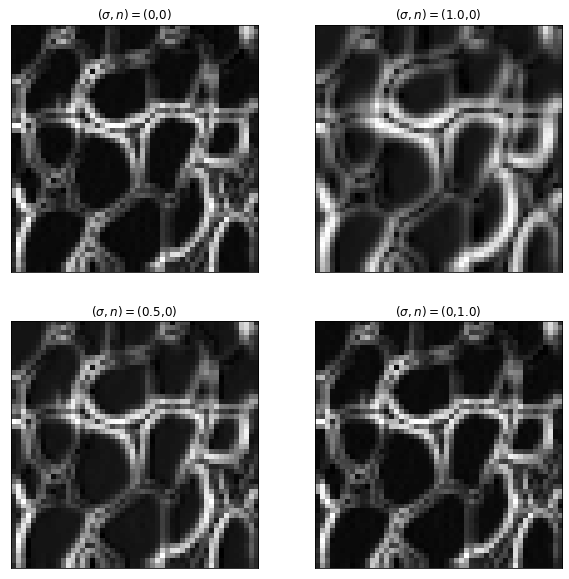

In [ ]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=2)

ImgGPru0=FiltroKirsch(ListImgGPru0[0])
sigma=0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 0].set_title(lab)
axes[0, 0].imshow(ImgGPru0,cmap='gray')
axes[0, 0].get_xaxis().set_visible(False)
axes[0, 0].get_yaxis().set_visible(False)

ImgGPru0=FiltroKirsch(ListImgGPru0[1])
sigma=0.5
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 0].set_title(lab)
axes[1, 0].imshow(ImgGPru0,cmap='gray')
axes[1, 0].get_xaxis().set_visible(False)
axes[1, 0].get_yaxis().set_visible(False)

ImgGPru0=FiltroKirsch(ListImgGPru0[2])
sigma=1.0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 1].set_title(lab)
axes[0, 1].imshow(ImgGPru0,cmap='gray')
axes[0, 1].get_xaxis().set_visible(False)
axes[0, 1].get_yaxis().set_visible(False)

ImgGPru0=FiltroKirsch(ListImgGPru0[3])
sigma=0
order=1.0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 1].set_title(lab)
axes[1, 1].imshow(ImgGPru0,cmap='gray')
axes[1, 1].get_xaxis().set_visible(False)
axes[1, 1].get_yaxis().set_visible(False)

fig.set_size_inches(10, 10)

#### **con cáncer**

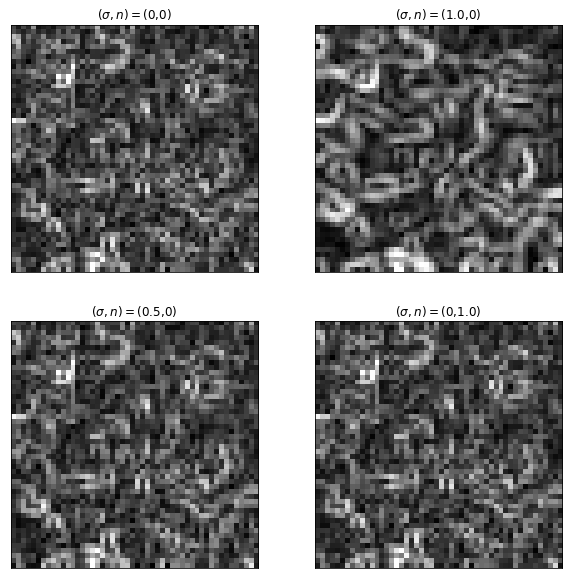

In [ ]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=2)

ImgGPru1=FiltroKirsch(ListImgGPru1[0])
sigma=0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 0].set_title(lab)
axes[0, 0].imshow(ImgGPru1,cmap='gray')
axes[0, 0].get_xaxis().set_visible(False)
axes[0, 0].get_yaxis().set_visible(False)

ImgGPru1=FiltroKirsch(ListImgGPru1[1])
sigma=0.5
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 0].set_title(lab)
axes[1, 0].imshow(ImgGPru1,cmap='gray')
axes[1, 0].get_xaxis().set_visible(False)
axes[1, 0].get_yaxis().set_visible(False)

ImgGPru1=FiltroKirsch(ListImgGPru1[2])
sigma=1.0
order=0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[0, 1].set_title(lab)
axes[0, 1].imshow(ImgGPru1,cmap='gray')
axes[0, 1].get_xaxis().set_visible(False)
axes[0, 1].get_yaxis().set_visible(False)

ImgGPru1=FiltroKirsch(ListImgGPru1[3])
sigma=0
order=1.0
lab="$(\sigma,n)=$" + "(" + str(sigma) + "," + str(order) + ")"
axes[1, 1].set_title(lab)
axes[1, 1].imshow(ImgGPru1,cmap='gray')
axes[1, 1].get_xaxis().set_visible(False)
axes[1, 1].get_yaxis().set_visible(False)

fig.set_size_inches(10, 10)

#### **Todas las imágenes**

In [ ]:
ListImgGK0=[]
for ImgG0 in ListImgG0:
    ImgGK0 = FiltroKirsch(ImgG0)
    ListImgGK0.append(ImgGK0)

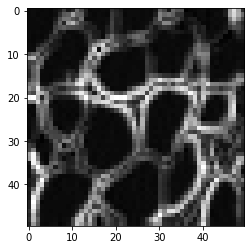

In [ ]:
plt.imshow(ListImgGK0[0],cmap='gray')
plt.show()

In [ ]:
ListImgGK1=[]
for ImgG1 in ListImgG1:
    ImgGK1 = FiltroKirsch(ImgG1)
    ListImgGK1.append(ImgGK1)

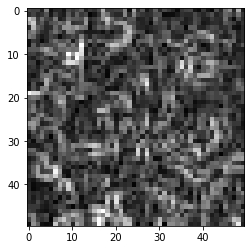

In [ ]:
plt.imshow(ListImgGK1[0],cmap='gray')
plt.show()

## Imprimir

In [ ]:
#Archivos con cáncer
Dir= "./Datos4/Kirsch/0/"
for i in range(len(ListImgGK0)):
    cv2.imwrite(Dir+str(i)+"0.png",ListImgGK0[i])

#Archivos con cáncer
Dir= "./Datos4/Kirsch/1/"
for i in range(len(ListImgGK1)):
    cv2.imwrite(Dir+str(i)+"1.png",ListImgGK1[i])